In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

In [3]:
import pandas as pd
import geopandas as gpd

In [4]:
import povertymapping.dhs_data_proc as pdhs

In [5]:
dhs_config = dict(
        save_path="../test_data/real_outputs/dhs_tl",
        repo_path="../data/SVII_PH_KH_MM_TL",
        data_dir="tl",
        dhs_folder="dhs_tl",
        dhs_zip_folder="TLHR71DT",
        dhs_file="TLHR71FL.DTA",
        country="tl",
        dhs_geo_zip_folder="TLGE71FL",
        dhs_geo_file="TLGE71FL.shp",
    )

In [6]:
!rm -rf {dhs_config['save_path']}

In [7]:
%%time
pdhs.process_dhs_data(dhs_config)

Data Dimensions: (11502, 3658)
Data Dimensions: (455, 1)
CPU times: user 1min 34s, sys: 1.63 s, total: 1min 36s
Wall time: 1min 36s


/home/butchtm/work/povmap/unicef-ai4d-poverty-mapping/env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [8]:
dhs_ph_base = pd.read_csv(Path(dhs_config['save_path'])/'TLHR71DT_base.csv')

In [9]:
len(dhs_ph_base)

11502

In [10]:
%%time
gdf = gpd.read_file(Path(dhs_config['save_path'])/'TLHR71DT_TLGE71FL_by_cluster.geojson')

CPU times: user 58.2 ms, sys: 9.94 ms, total: 68.2 ms
Wall time: 67.2 ms


In [11]:
gdf.columns

Index(['DHSCLUST', 'Wealth Index', 'DHSID', 'DHSCC', 'DHSYEAR', 'CCFIPS',
       'ADM1FIPS', 'ADM1FIPSNA', 'ADM1SALBNA', 'ADM1SALBCO', 'ADM1DHS',
       'ADM1NAME', 'DHSREGCO', 'DHSREGNA', 'SOURCE', 'URBAN_RURA', 'LATNUM',
       'LONGNUM', 'ALT_GPS', 'ALT_DEM', 'DATUM', 'F21', 'F22', 'F23',
       'geometry'],
      dtype='object')

In [12]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
gdf.head()

,DHSCLUST,Wealth Index,DHSID,DHSCC,DHSYEAR,CCFIPS,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,ADM1SALBCO,...,URBAN_RURA,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,DATUM,F21,F22,F23,geometry
0,1,32166.600000,TL201600000001,TL,2016.0,TT,NULL,NULL,NULL,NULL,...,R,-8.712016,125.567381,9999.0,1005.0,WGS84,None,None,None,POINT (125.56738 -8.71202)
1,2,-34063.923077,TL201600000002,TL,2016.0,TT,NULL,NULL,NULL,NULL,...,R,-8.730226,125.590219,9999.0,1342.0,WGS84,None,None,None,POINT (125.59022 -8.73023)
2,3,39230.590909,TL201600000003,TL,2016.0,TT,NULL,NULL,NULL,NULL,...,R,-8.741340,125.556399,9999.0,1060.0,WGS84,None,None,None,POINT (125.55640 -8.74134)
3,4,-82140.227273,TL201600000004,TL,2016.0,TT,NULL,NULL,NULL,NULL,...,R,-8.811291,125.535161,9999.0,1986.0,WGS84,None,None,None,POINT (125.53516 -8.81129)
4,5,-56203.423077,TL201600000005,TL,2016.0,TT,NULL,NULL,NULL,NULL,...,R,-8.791590,125.473219,9999.0,1491.0,WGS84,None,None,None,POINT (125.47322 -8.79159)


In [14]:
import matplotlib.pyplot as plt

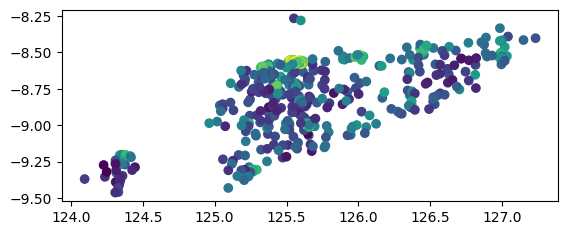

In [18]:
# remove data where lat/long == 0.0
ax = plt.axes()
ax = gdf.plot(column='Wealth Index',ax=ax)